# Прогнозирование одобрения банковских кредитов с помощью искусственных нейронных сетей
В этом практическом проекте мы построим и обучим простую модель глубокой нейронной сети для прогнозирования одобрения персонального кредита для человека на основе таких характеристик, как возраст, опыт, доход, местоположение, семья, образование, наличие ипотеки, кредитной карты и т.д. Данные были полученный на [Kaggle](https://www.kaggle.com/lowecoryr/universalbank). 
В этом практическом проекте мы выполним следующие этапы:
* Импорт данных и библиотек
* Выполняем разведовачный анализ данных
* Выполняем визуализацию данных
* Подготовка данных перед обучением модели
* Строим простую модель многослойной нейронной сети
* Составление и обучение модели глубокого обучения
* Оцениваем работу обученной модели

### Импорт данных и библиотек

In [2]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set_style("darkgrid")
sns.set_palette("pastel")

from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [3]:
# Загружаем набор данных
df = pd.read_csv("data.csv")

In [4]:
# Визуализация набора данных
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


### Выполняем разведовачный анализ данных

In [5]:
# Получаем информацию о датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [6]:
# Получаем статистическую сводку по датафрейму
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


### Выполняем визуализацию данных

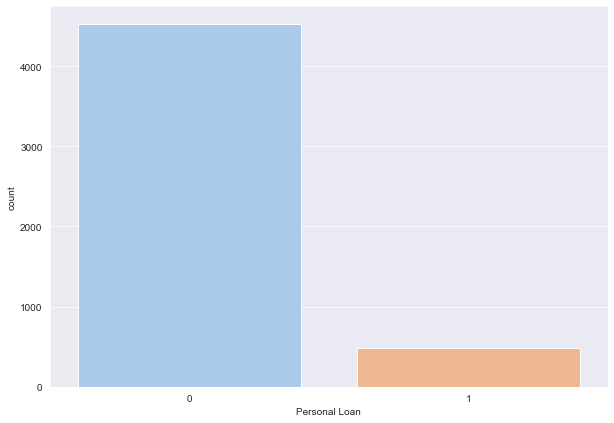

In [7]:
# Визуализация столбца Personal Loan 
# Процент клиентов, принявших персональный кредит ~ 9%
plt.figure(figsize = (10,7))
sns.countplot(df['Personal Loan'])
plt.show("png")

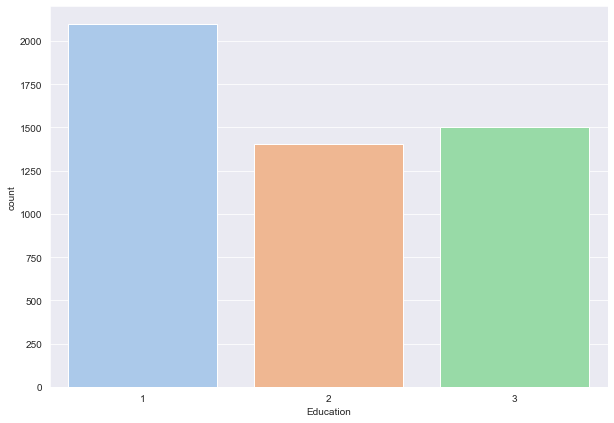

In [8]:
# Визуализация признака Education
plt.figure(figsize = (10,7))
sns.countplot(df['Education'])
plt.show("png")

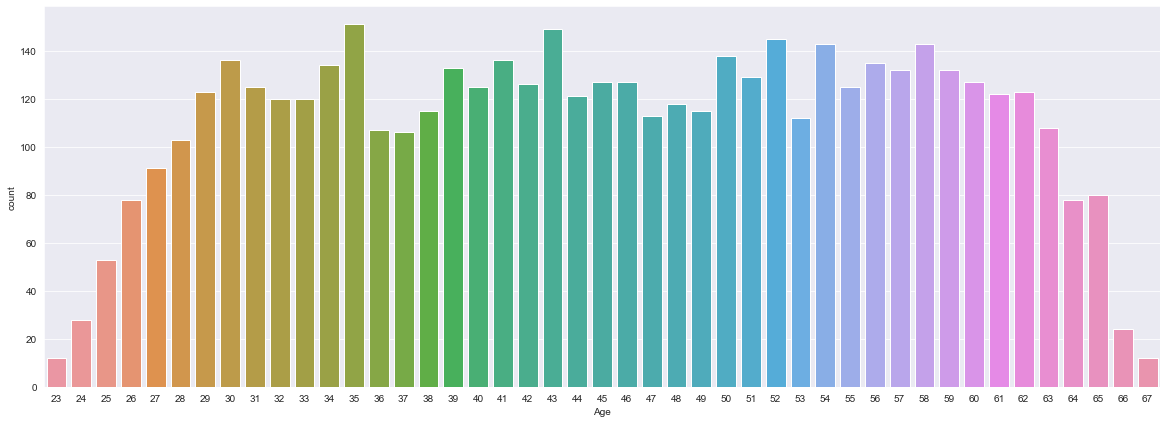

In [9]:
# Визуализация возраста
plt.figure(figsize = (20,7))
sns.countplot(df['Age'])
plt.show("png")

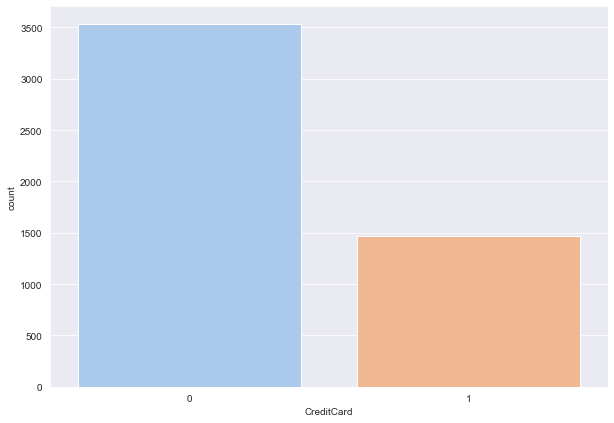

In [10]:
# Визуализация наличия кредитных карт
plt.figure(figsize = (10,7))
sns.countplot(df['CreditCard'])
plt.show("png")

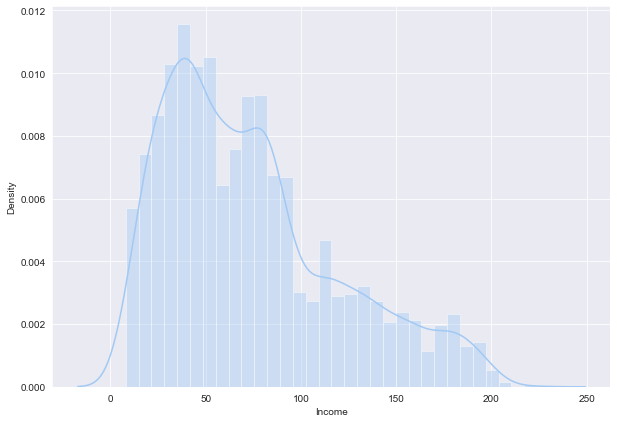

In [11]:
# Визуализация данных о доходах
# Доходы большинства клиентов находятся в диапазоне от 45 до 60 тысяч в год
plt.figure(figsize = (10,7))
sns.distplot(df['Income'])
plt.show("png")

In [12]:
# Создайте два датафрейма для двух классов
personalloans = df[df['Personal Loan'] == 1]
no_personalloans = df[df['Personal Loan'] == 0]

In [13]:
personalloans

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0
16,17,38,14,130,95010,4,4.7,3,134,1,0,0,0,0
18,19,46,21,193,91604,2,8.1,3,0,1,0,0,0,0
29,30,38,13,119,94104,1,3.3,2,0,1,0,1,1,1
38,39,42,18,141,94114,3,5.0,3,0,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,4884,38,13,129,92646,3,4.1,3,0,1,0,1,1,1
4927,4928,43,19,121,94720,1,0.7,2,0,1,0,1,1,1
4941,4942,28,4,112,90049,2,1.6,2,0,1,0,0,1,0
4962,4963,46,20,122,90065,3,3.0,3,0,1,0,1,1,1


In [14]:
# Средний доход клиентов, имеющих персональные кредиты, как правило, высок ~ 144K, а средний CC составляет 3,9K
personalloans.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.0,480.000000,480.000000,480.00000,480.000000
mean,2390.650000,45.066667,19.843750,144.745833,93153.202083,2.612500,3.905354,2.233333,100.845833,1.0,0.125000,0.291667,0.60625,0.297917
std,1394.393674,11.590964,11.582443,31.584429,1759.223753,1.115393,2.097681,0.753373,160.847862,0.0,0.331064,0.455004,0.48909,0.457820
min,10.000000,26.000000,0.000000,60.000000,90016.000000,1.000000,0.000000,1.000000,0.000000,1.0,0.000000,0.000000,0.00000,0.000000
25%,1166.500000,35.000000,9.000000,122.000000,91908.750000,2.000000,2.600000,2.000000,0.000000,1.0,0.000000,0.000000,0.00000,0.000000
50%,2342.000000,45.000000,20.000000,142.500000,93407.000000,3.000000,3.800000,2.000000,0.000000,1.0,0.000000,0.000000,1.00000,0.000000
75%,3566.000000,55.000000,30.000000,172.000000,94705.500000,4.000000,5.347500,3.000000,192.500000,1.0,0.000000,1.000000,1.00000,1.000000
max,4981.000000,65.000000,41.000000,203.000000,96008.000000,4.000000,10.000000,3.000000,617.000000,1.0,1.000000,1.000000,1.00000,1.000000


In [15]:
no_personalloans

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [16]:
# Средний доход клиентов, не имеющих персональных кредитов, как правило, низкий ~ 66K, а средний CC составляет 1,7K.
personalloans.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.0,480.000000,480.000000,480.00000,480.000000
mean,2390.650000,45.066667,19.843750,144.745833,93153.202083,2.612500,3.905354,2.233333,100.845833,1.0,0.125000,0.291667,0.60625,0.297917
std,1394.393674,11.590964,11.582443,31.584429,1759.223753,1.115393,2.097681,0.753373,160.847862,0.0,0.331064,0.455004,0.48909,0.457820
min,10.000000,26.000000,0.000000,60.000000,90016.000000,1.000000,0.000000,1.000000,0.000000,1.0,0.000000,0.000000,0.00000,0.000000
25%,1166.500000,35.000000,9.000000,122.000000,91908.750000,2.000000,2.600000,2.000000,0.000000,1.0,0.000000,0.000000,0.00000,0.000000
50%,2342.000000,45.000000,20.000000,142.500000,93407.000000,3.000000,3.800000,2.000000,0.000000,1.0,0.000000,0.000000,1.00000,0.000000
75%,3566.000000,55.000000,30.000000,172.000000,94705.500000,4.000000,5.347500,3.000000,192.500000,1.0,0.000000,1.000000,1.00000,1.000000
max,4981.000000,65.000000,41.000000,203.000000,96008.000000,4.000000,10.000000,3.000000,617.000000,1.0,1.000000,1.000000,1.00000,1.000000


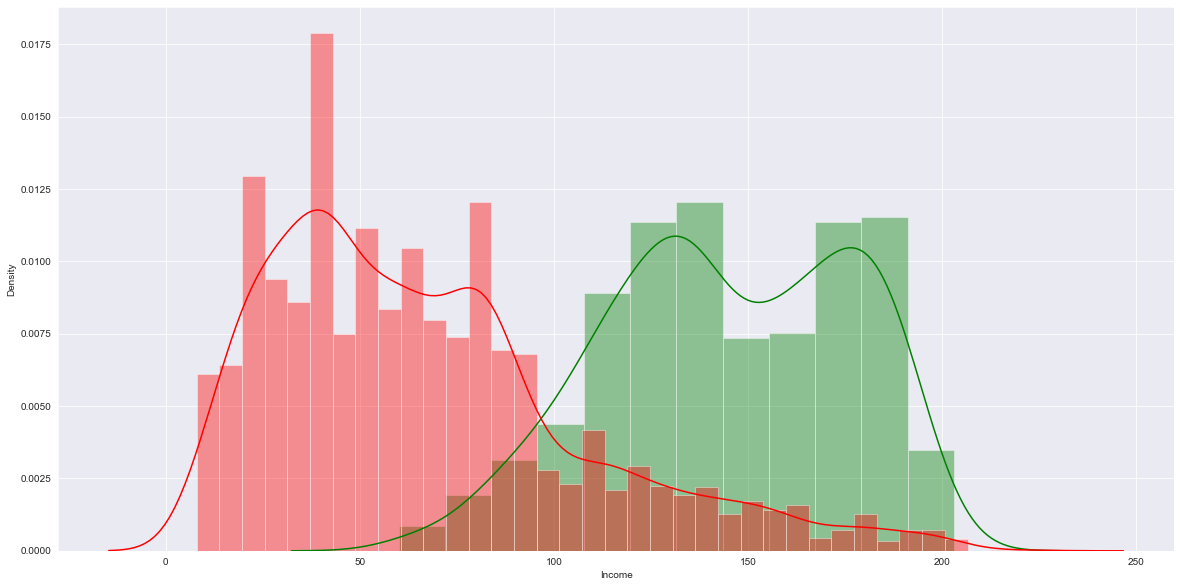

In [17]:
# Строим график распределения для обоих классов по отдельности 
# Клиенты, взявшие персональные кредиты, как правило, имеют более высокий доход
plt.figure(figsize = (20, 10))
sns.distplot(personalloans['Income'], color="g")
sns.distplot(no_personalloans['Income'], color="r")
plt.show("png")

<Figure size 2160x2160 with 0 Axes>

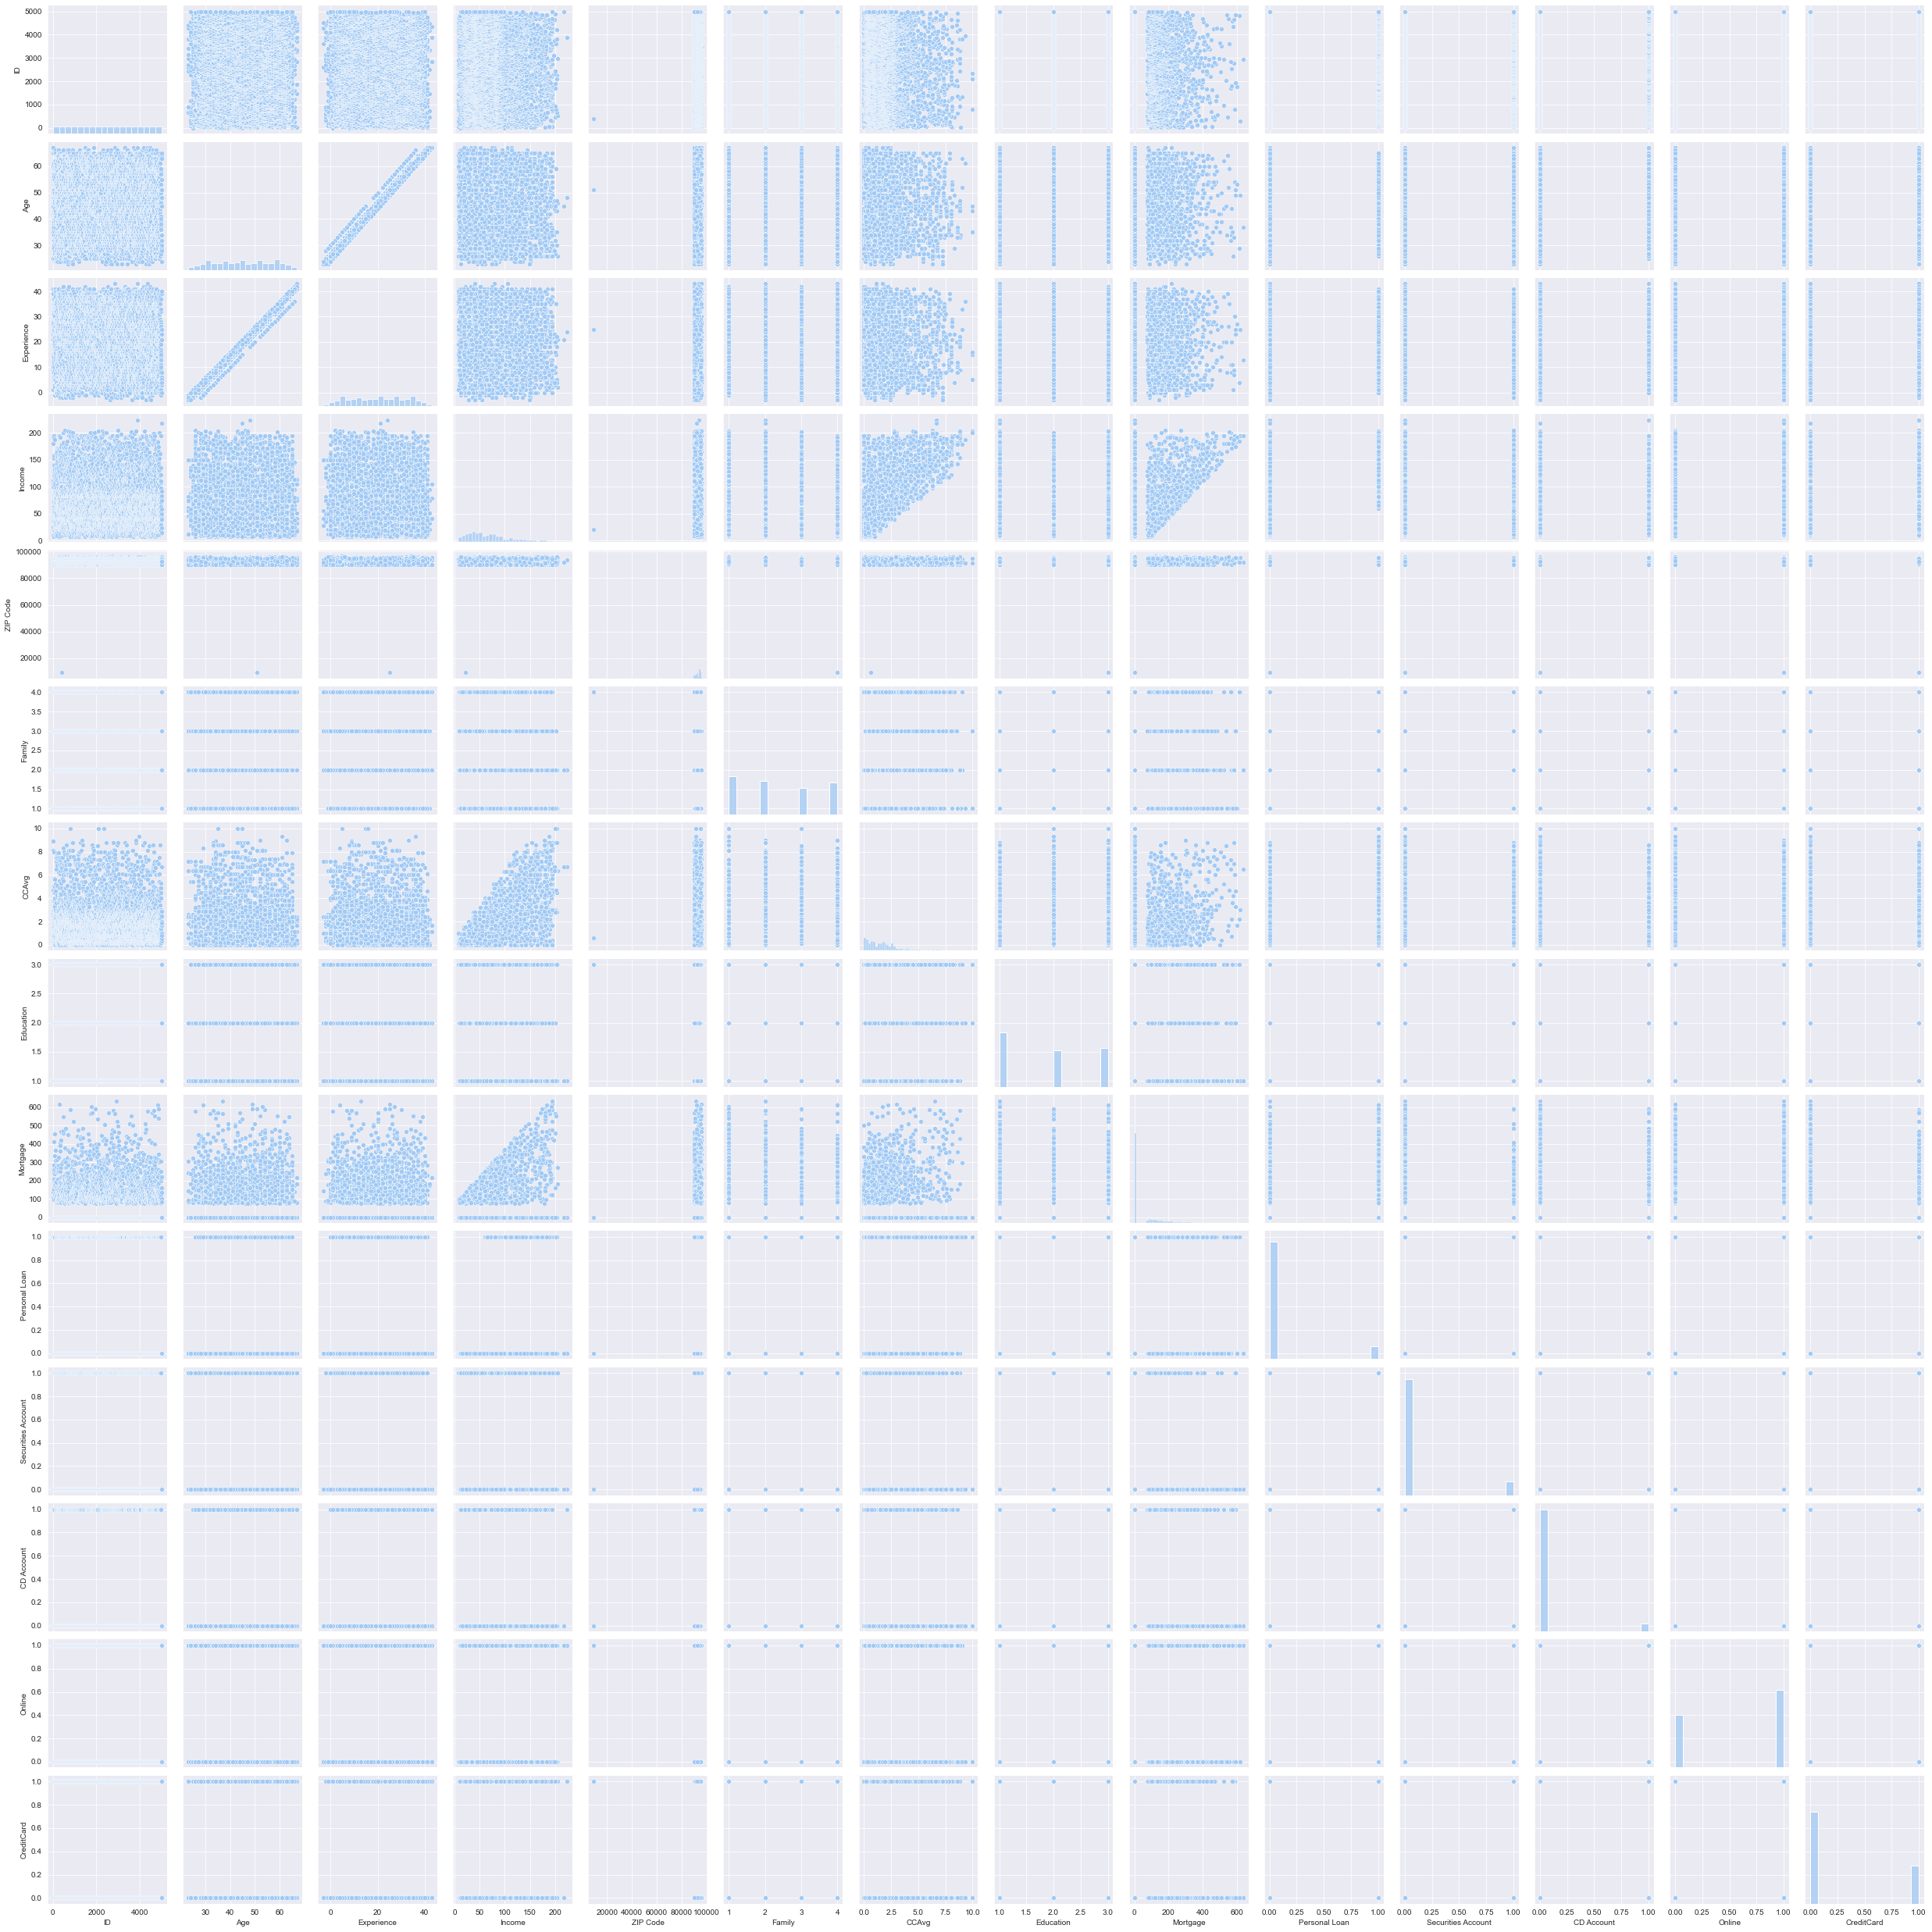

In [18]:
plt.figure(figsize = (30, 30))
sns.pairplot(df)
plt.show("png")

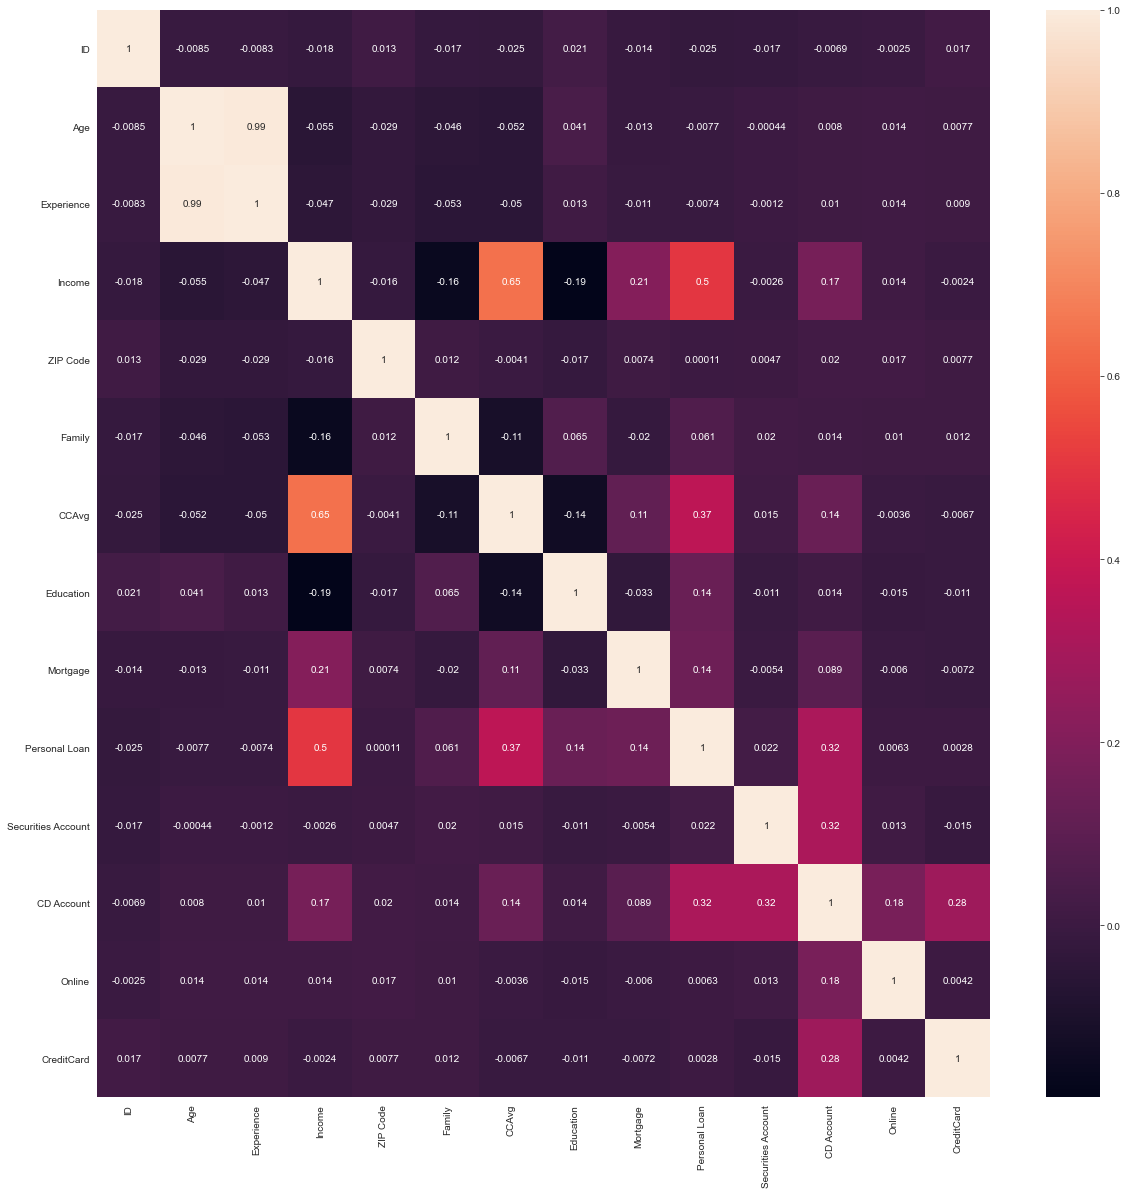

In [19]:
# Корреляционный график
# Сильная положительная корреляция между опытом и возрастом
# Сильная положительная корреляция между средним CC и доходом
plt.figure(figsize = (20, 20))
cm = df.corr()
sns.heatmap(cm, annot = True)
plt.show("png")

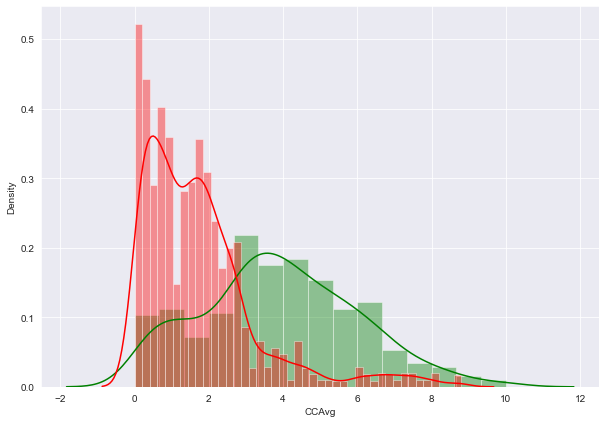

In [20]:
plt.figure(figsize = (10, 7))
sns.distplot(personalloans['CCAvg'], color="g")
sns.distplot(no_personalloans['CCAvg'], color = "r")
plt.show("png")

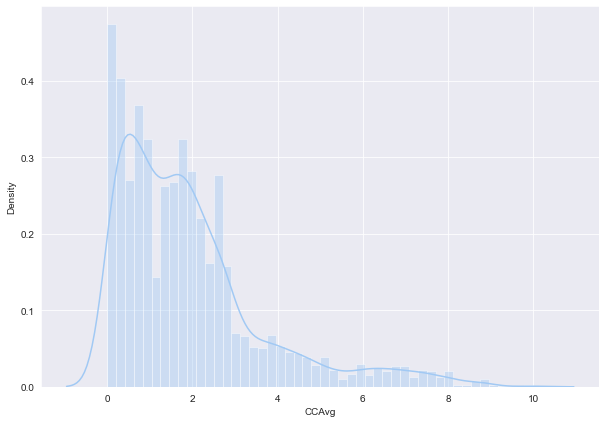

In [21]:
plt.figure(figsize = (10, 7))
sns.distplot(df['CCAvg'])
plt.show("png")

### Подготовка данных перед обучением модели

In [22]:
# Указываем входные данные модели (все данные, кроме целевой переменной) 
X = df.drop(columns=["Personal Loan"])
X

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,1,0


In [23]:
# Выход модели (целевая переменная)
y = df["Personal Loan"]
y

0       0
1       0
2       0
3       0
4       0
       ..
4995    0
4996    0
4997    0
4998    0
4999    0
Name: Personal Loan, Length: 5000, dtype: int64

In [24]:
y = to_categorical(y)
y

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [25]:
# масштабируем данные перед обучением модели
scaler_x = StandardScaler()
X = scaler_x.fit_transform(X)


In [26]:
# Разбиваем данные на тестовый и обучающий наборы

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9)

### Строим простую модель многослойной нейронной сети

In [27]:
# Создаем keras sequential model
ANN_model = keras.Sequential()

# Добавляем dense слой
ANN_model.add(Dense(250, input_dim = 13, kernel_initializer = 'normal',activation = 'relu'))

ANN_model.add(Dropout(0.3))
ANN_model.add(Dense(500, activation='relu'))

ANN_model.add(Dropout(0.3))
ANN_model.add(Dense(500, activation='relu'))

ANN_model.add(Dropout(0.3))
ANN_model.add(Dense(500, activation='relu'))

ANN_model.add(Dropout(0.4))
ANN_model.add(Dense(250, activation='linear'))

ANN_model.add(Dropout(0.4))

# Добавляем dense слой с активацией softmax
ANN_model.add(Dense(2, activation = 'softmax'))
ANN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 250)               3500      
                                                                 
 dropout (Dropout)           (None, 250)               0         
                                                                 
 dense_1 (Dense)             (None, 500)               125500    
                                                                 
 dropout_1 (Dropout)         (None, 500)               0         
                                                                 
 dense_2 (Dense)             (None, 500)               250500    
                                                                 
 dropout_2 (Dropout)         (None, 500)               0         
                                                                 
 dense_3 (Dense)             (None, 500)               2

### Составление и обучение модели глубокого обучения

In [28]:
# Компилируем модель
ANN_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [29]:
history = ANN_model.fit(X_train, y_train, epochs=20, validation_split=0.2, verbose=1)

Epoch 1/20
113/113 [==============================] - 3s 15ms/step - loss: 0.1796 - accuracy: 0.9297 - val_loss: 0.1186 - val_accuracy: 0.9544
Epoch 2/20
113/113 [==============================] - 2s 15ms/step - loss: 0.0972 - accuracy: 0.9656 - val_loss: 0.0928 - val_accuracy: 0.9644
Epoch 3/20
113/113 [==============================] - 2s 19ms/step - loss: 0.0852 - accuracy: 0.9689 - val_loss: 0.0791 - val_accuracy: 0.9689
Epoch 4/20
113/113 [==============================] - 1s 12ms/step - loss: 0.0723 - accuracy: 0.9747 - val_loss: 0.0776 - val_accuracy: 0.9767
Epoch 5/20
113/113 [==============================] - 2s 16ms/step - loss: 0.0726 - accuracy: 0.9758 - val_loss: 0.0723 - val_accuracy: 0.9733
Epoch 6/20
113/113 [==============================] - 1s 13ms/step - loss: 0.0608 - accuracy: 0.9778 - val_loss: 0.0812 - val_accuracy: 0.9778
Epoch 7/20
113/113 [==============================] - 1s 12ms/step - loss: 0.0648 - accuracy: 0.9786 - val_loss: 0.0769 - val_accuracy: 0.9789

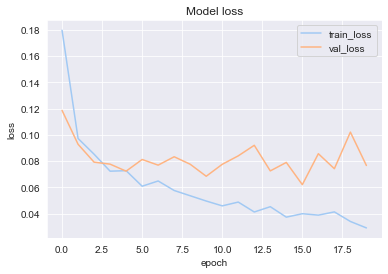

In [30]:
# Строим график производительности модели по эпохам
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss','val_loss'], loc = 'upper right')
plt.show("png")

### Оцениваем работу обученной модели

In [31]:
# Делаем прогнозы
predictions = ANN_model.predict(X_test)

# Добавляем индекс максимального значения с помощью функции argmax
predict = []
for i in predictions:
    predict.append(np.argmax(i))

In [32]:
# Получаем точность модели
result = ANN_model.evaluate(X_test, y_test)

print("Accuracy : {}".format(result[1]))

16/16 [==============================] - 0s 4ms/step - loss: 0.0755 - accuracy: 0.9780
Accuracy : 0.9779999852180481


In [33]:
# Получаем исходное значение
y_original = []

for i in y_test:
    y_original.append(np.argmax(i))

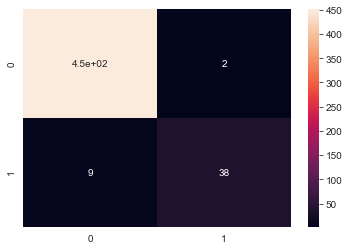

In [34]:
# Матрица ошибок
conf_matrix = metrics.confusion_matrix(y_original, predict)
sns.heatmap(conf_matrix, annot = True)
plt.show("png")

In [35]:
# Вывод отчета о точности модели
print(classification_report(y_original, predict))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       453
           1       0.95      0.81      0.87        47

    accuracy                           0.98       500
   macro avg       0.97      0.90      0.93       500
weighted avg       0.98      0.98      0.98       500

